# 🍌🍎❓ Dataset Exploration: Banana, Apple, and Other


This notebook explores the updated 3-class image classification dataset consisting of:

- **Banana**
- **Apple**
- **Other** (random or out-of-class images)

We will check image distribution, visualize sample images, and inspect dataset statistics.


In [ ]:

import os
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.io import read_image
from torchvision.transforms import ToPILImage
import torchvision.transforms as transforms
from PIL import Image
from collections import defaultdict
import random
from collections import defaultdict
import pandas as pd
import torch
import sys
import os
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights




In [73]:
import os
from collections import defaultdict

base_dir = '../dataset'
folders = ['train', 'val', 'test']

dataset_stats = defaultdict(lambda: defaultdict(int))

for split in folders:
    split_path = os.path.join(base_dir, split)
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            dataset_stats[split][class_name] = count

dataset_stats = dict(dataset_stats)
dataset_stats

{'train': defaultdict(int, {'apple': 91, 'banana': 91, 'other': 141}),
 'val': defaultdict(int, {'apple': 19, 'banana': 19, 'other': 30}),
 'test': defaultdict(int, {'apple': 21, 'banana': 21, 'other': 31})}

## 📊 Class Distribution per Split

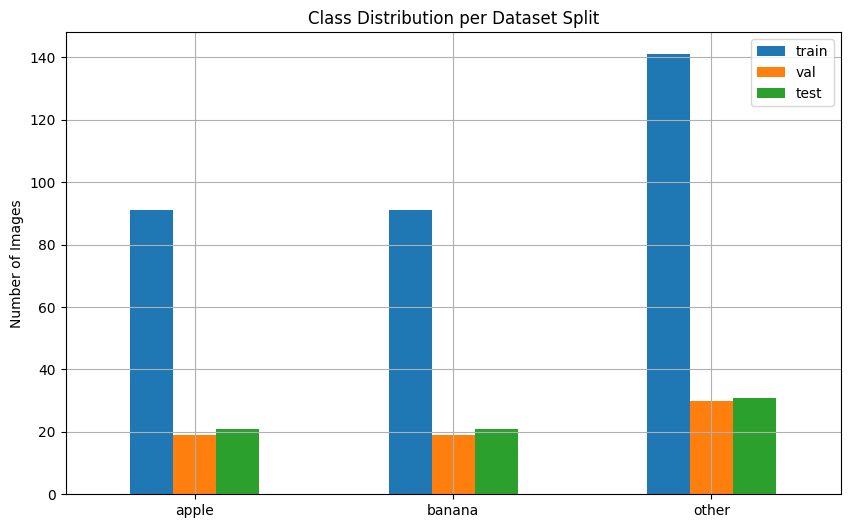

In [74]:

import pandas as pd

df_stats = pd.DataFrame(dataset_stats).fillna(0).astype(int)
df_stats.plot(kind='bar', figsize=(10, 6), title="Class Distribution per Dataset Split")
plt.ylabel("Number of Images")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


## 🖼️ Random Sample Images from Each Class

--- TRAIN ---


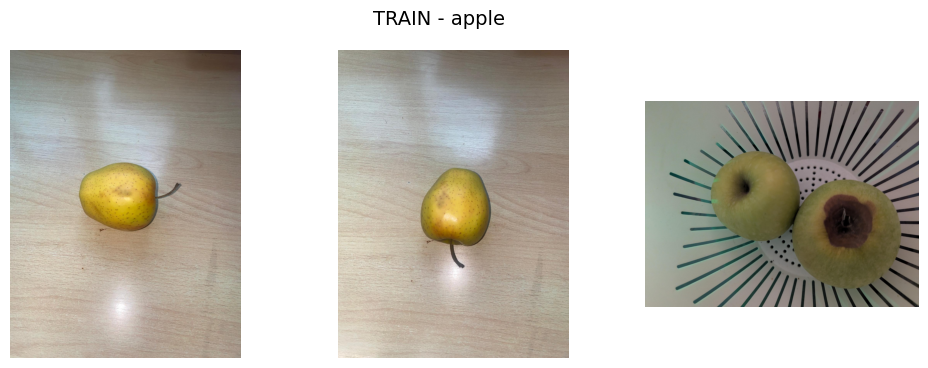

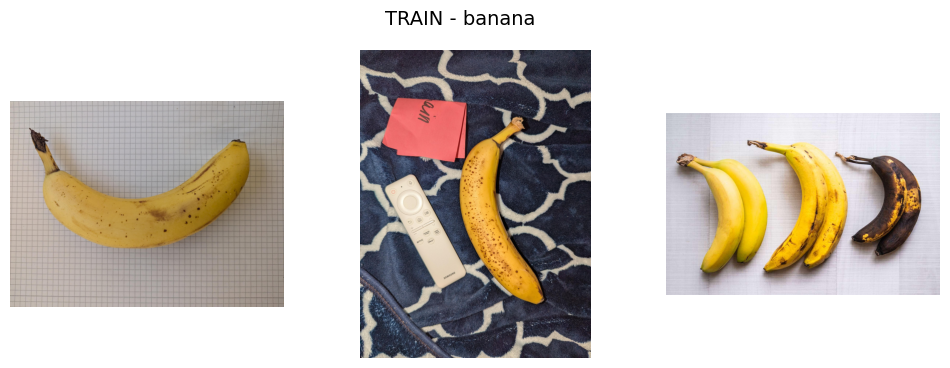

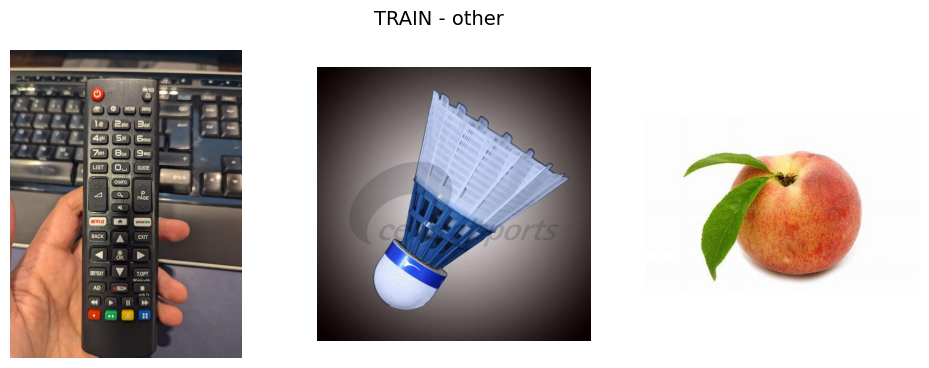

--- VAL ---


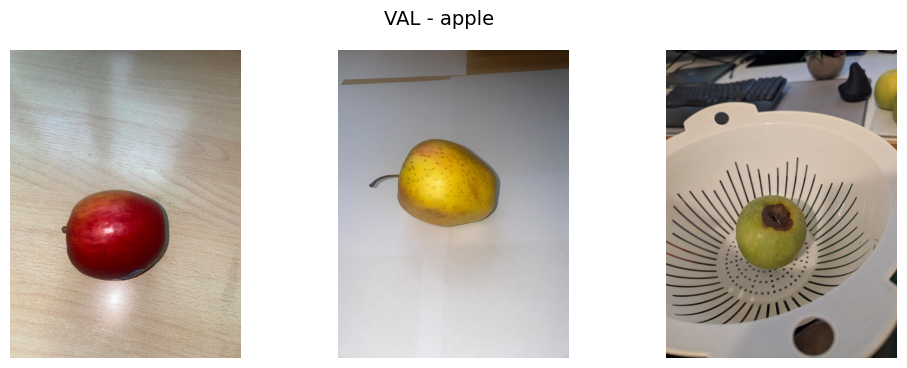

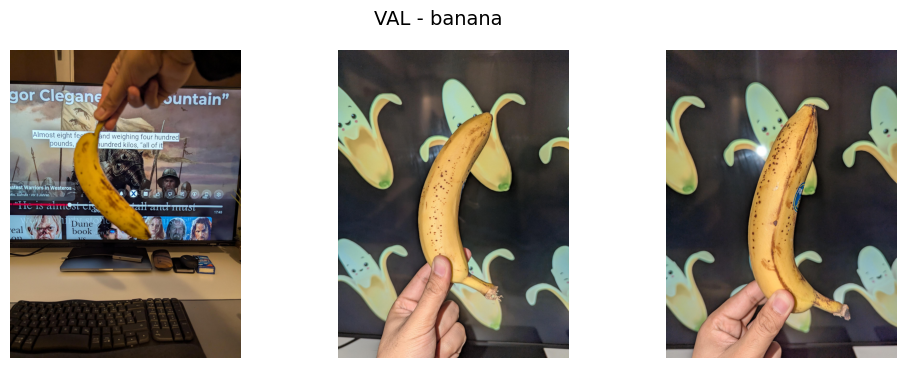

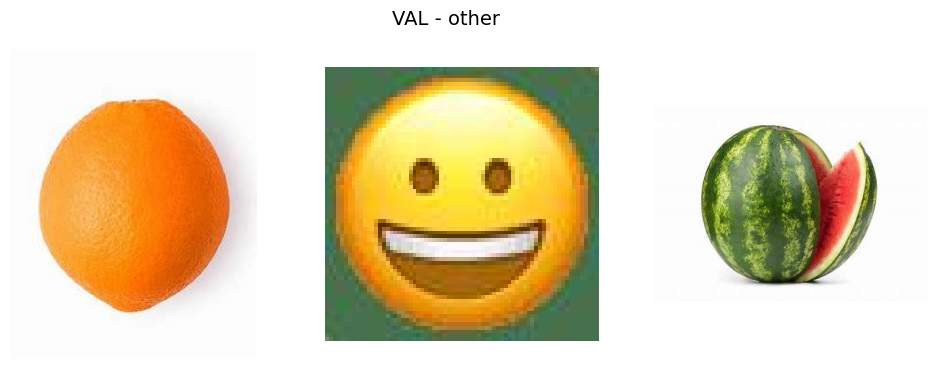

--- TEST ---


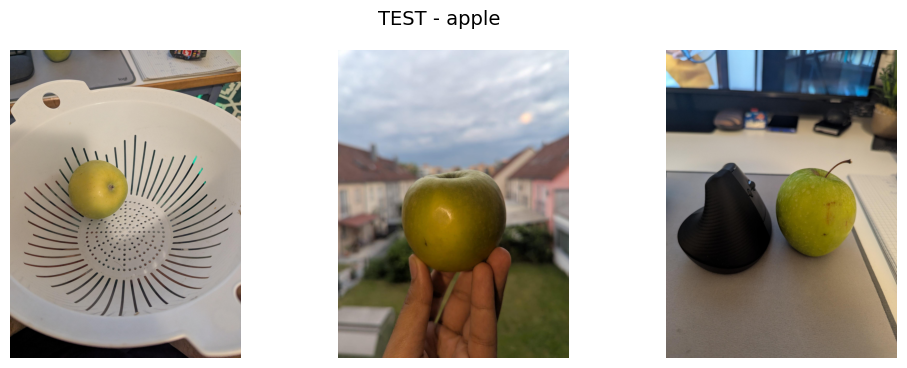

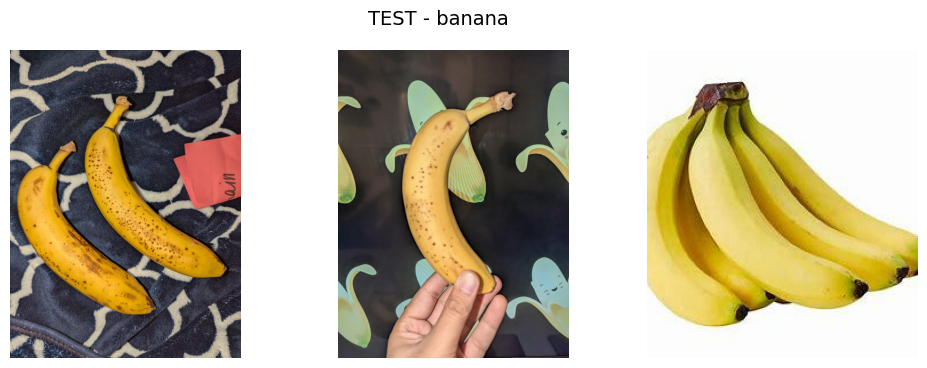

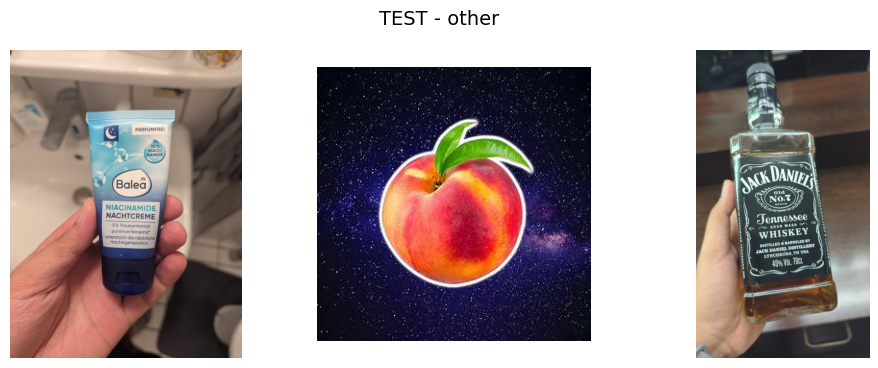

In [75]:

to_pil = ToPILImage()
n_samples = 3
for split in folders:
    print(f"--- {split.upper()} ---")
    for class_name in os.listdir(os.path.join(base_dir, split)):
        class_dir = os.path.join(base_dir, split, class_name)
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)
            sample_files = random.sample(images, min(n_samples, len(images)))
            fig, axs = plt.subplots(1, len(sample_files), figsize=(12, 4))
            fig.suptitle(f"{split.upper()} - {class_name}", fontsize=14)
            for i, img_name in enumerate(sample_files):
                img_path = os.path.join(class_dir, img_name)
                img = read_image(img_path)
                axs[i].imshow(to_pil(img))
                axs[i].axis('off')
            plt.show()


In [76]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

train_path = os.path.join(base_dir, 'train')
train_dataset = datasets.ImageFolder(train_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

images, labels = next(iter(train_loader))

mean_pixel = images.mean().item()
std_pixel = images.std().item()
img_shape = list(images.shape[1:])

print("Image Shape (C, H, W):", img_shape)
print("Mean Pixel Value:", round(mean_pixel, 4))
print("Std Pixel Value:", round(std_pixel, 4))
print("Class Names:", train_dataset.classes)


Image Shape (C, H, W): [3, 128, 128]
Mean Pixel Value: 0.5077
Std Pixel Value: 0.3037
Class Names: ['apple', 'banana', 'other']


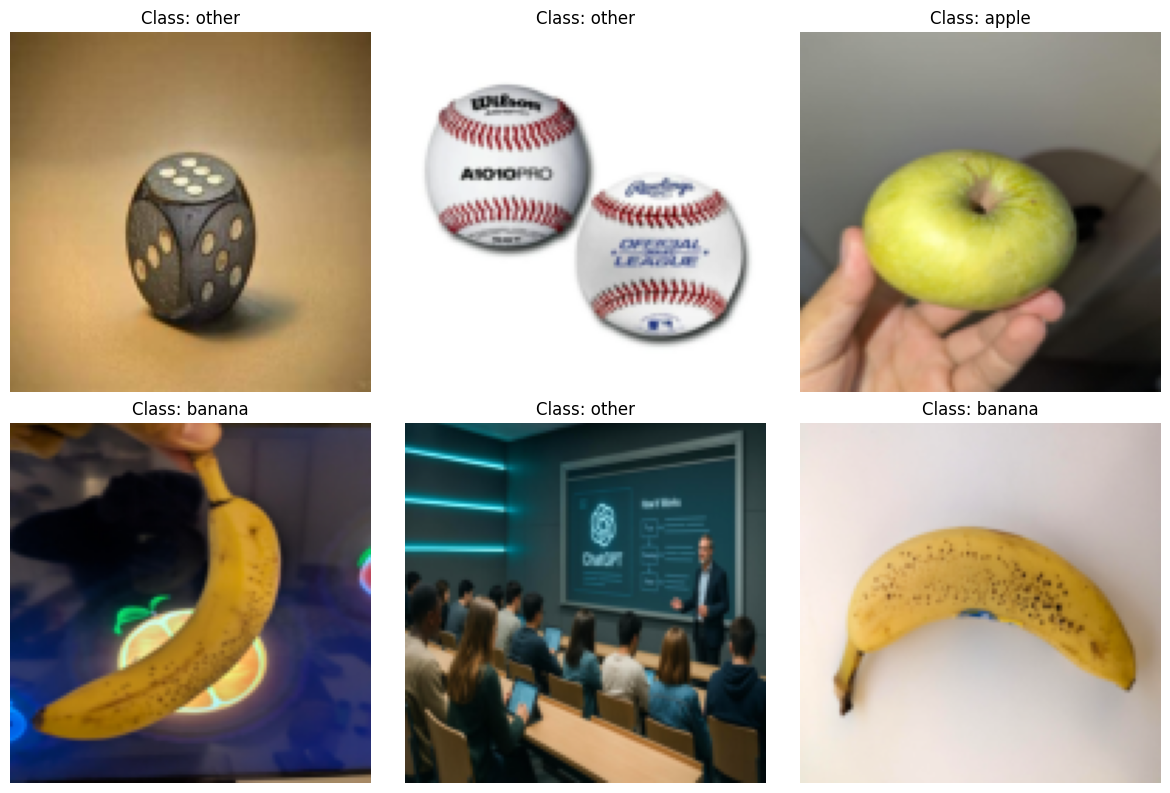

In [77]:
class_names = train_dataset.classes
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i in range(6):
    img = images[i].permute(1, 2, 0).numpy()
    img = (img - img.min()) / (img.max() - img.min())  # normalize for display
    label = class_names[labels[i]]
    axs[i // 3, i % 3].imshow(img)
    axs[i // 3, i % 3].set_title(f'Class: {label}')
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()


In [78]:
# Add the src folder to Python's path
sys.path.append(os.path.abspath("../src"))

In [ ]:

class BananaOrAppleClassifier(nn.Module):
    def __init__(self, num_classes=3):
        super(BananaOrAppleClassifier, self).__init__()
        self.base_model = resnet18(weights=ResNet18_Weights.DEFAULT)
        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.base_model(x)


In [82]:
model = BananaOrAppleClassifier()
model.load_state_dict(torch.load('../../hf_app/banana_or_apple.pt', map_location='cpu'))
model.eval()

RuntimeError: Error(s) in loading state_dict for BananaOrAppleClassifier:
	Missing key(s) in state_dict: "model.0.weight", "model.0.bias", "model.3.weight", "model.3.bias", "model.7.weight", "model.7.bias", "model.10.weight", "model.10.bias". 
	Unexpected key(s) in state_dict: "base_model.conv1.weight", "base_model.bn1.weight", "base_model.bn1.bias", "base_model.bn1.running_mean", "base_model.bn1.running_var", "base_model.bn1.num_batches_tracked", "base_model.layer1.0.conv1.weight", "base_model.layer1.0.bn1.weight", "base_model.layer1.0.bn1.bias", "base_model.layer1.0.bn1.running_mean", "base_model.layer1.0.bn1.running_var", "base_model.layer1.0.bn1.num_batches_tracked", "base_model.layer1.0.conv2.weight", "base_model.layer1.0.bn2.weight", "base_model.layer1.0.bn2.bias", "base_model.layer1.0.bn2.running_mean", "base_model.layer1.0.bn2.running_var", "base_model.layer1.0.bn2.num_batches_tracked", "base_model.layer1.1.conv1.weight", "base_model.layer1.1.bn1.weight", "base_model.layer1.1.bn1.bias", "base_model.layer1.1.bn1.running_mean", "base_model.layer1.1.bn1.running_var", "base_model.layer1.1.bn1.num_batches_tracked", "base_model.layer1.1.conv2.weight", "base_model.layer1.1.bn2.weight", "base_model.layer1.1.bn2.bias", "base_model.layer1.1.bn2.running_mean", "base_model.layer1.1.bn2.running_var", "base_model.layer1.1.bn2.num_batches_tracked", "base_model.layer2.0.conv1.weight", "base_model.layer2.0.bn1.weight", "base_model.layer2.0.bn1.bias", "base_model.layer2.0.bn1.running_mean", "base_model.layer2.0.bn1.running_var", "base_model.layer2.0.bn1.num_batches_tracked", "base_model.layer2.0.conv2.weight", "base_model.layer2.0.bn2.weight", "base_model.layer2.0.bn2.bias", "base_model.layer2.0.bn2.running_mean", "base_model.layer2.0.bn2.running_var", "base_model.layer2.0.bn2.num_batches_tracked", "base_model.layer2.0.downsample.0.weight", "base_model.layer2.0.downsample.1.weight", "base_model.layer2.0.downsample.1.bias", "base_model.layer2.0.downsample.1.running_mean", "base_model.layer2.0.downsample.1.running_var", "base_model.layer2.0.downsample.1.num_batches_tracked", "base_model.layer2.1.conv1.weight", "base_model.layer2.1.bn1.weight", "base_model.layer2.1.bn1.bias", "base_model.layer2.1.bn1.running_mean", "base_model.layer2.1.bn1.running_var", "base_model.layer2.1.bn1.num_batches_tracked", "base_model.layer2.1.conv2.weight", "base_model.layer2.1.bn2.weight", "base_model.layer2.1.bn2.bias", "base_model.layer2.1.bn2.running_mean", "base_model.layer2.1.bn2.running_var", "base_model.layer2.1.bn2.num_batches_tracked", "base_model.layer3.0.conv1.weight", "base_model.layer3.0.bn1.weight", "base_model.layer3.0.bn1.bias", "base_model.layer3.0.bn1.running_mean", "base_model.layer3.0.bn1.running_var", "base_model.layer3.0.bn1.num_batches_tracked", "base_model.layer3.0.conv2.weight", "base_model.layer3.0.bn2.weight", "base_model.layer3.0.bn2.bias", "base_model.layer3.0.bn2.running_mean", "base_model.layer3.0.bn2.running_var", "base_model.layer3.0.bn2.num_batches_tracked", "base_model.layer3.0.downsample.0.weight", "base_model.layer3.0.downsample.1.weight", "base_model.layer3.0.downsample.1.bias", "base_model.layer3.0.downsample.1.running_mean", "base_model.layer3.0.downsample.1.running_var", "base_model.layer3.0.downsample.1.num_batches_tracked", "base_model.layer3.1.conv1.weight", "base_model.layer3.1.bn1.weight", "base_model.layer3.1.bn1.bias", "base_model.layer3.1.bn1.running_mean", "base_model.layer3.1.bn1.running_var", "base_model.layer3.1.bn1.num_batches_tracked", "base_model.layer3.1.conv2.weight", "base_model.layer3.1.bn2.weight", "base_model.layer3.1.bn2.bias", "base_model.layer3.1.bn2.running_mean", "base_model.layer3.1.bn2.running_var", "base_model.layer3.1.bn2.num_batches_tracked", "base_model.layer4.0.conv1.weight", "base_model.layer4.0.bn1.weight", "base_model.layer4.0.bn1.bias", "base_model.layer4.0.bn1.running_mean", "base_model.layer4.0.bn1.running_var", "base_model.layer4.0.bn1.num_batches_tracked", "base_model.layer4.0.conv2.weight", "base_model.layer4.0.bn2.weight", "base_model.layer4.0.bn2.bias", "base_model.layer4.0.bn2.running_mean", "base_model.layer4.0.bn2.running_var", "base_model.layer4.0.bn2.num_batches_tracked", "base_model.layer4.0.downsample.0.weight", "base_model.layer4.0.downsample.1.weight", "base_model.layer4.0.downsample.1.bias", "base_model.layer4.0.downsample.1.running_mean", "base_model.layer4.0.downsample.1.running_var", "base_model.layer4.0.downsample.1.num_batches_tracked", "base_model.layer4.1.conv1.weight", "base_model.layer4.1.bn1.weight", "base_model.layer4.1.bn1.bias", "base_model.layer4.1.bn1.running_mean", "base_model.layer4.1.bn1.running_var", "base_model.layer4.1.bn1.num_batches_tracked", "base_model.layer4.1.conv2.weight", "base_model.layer4.1.bn2.weight", "base_model.layer4.1.bn2.bias", "base_model.layer4.1.bn2.running_mean", "base_model.layer4.1.bn2.running_var", "base_model.layer4.1.bn2.num_batches_tracked", "base_model.fc.0.weight", "base_model.fc.0.bias", "base_model.fc.3.weight", "base_model.fc.3.bias". 

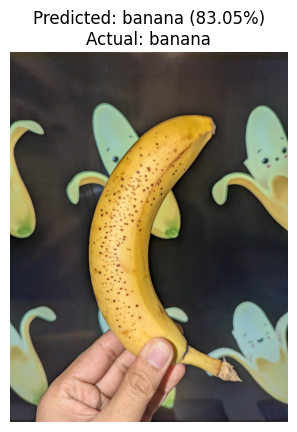

In [ ]:
# Define test image folder
test_dir = "../dataset/test"
classes = os.listdir(test_dir)

# Select a random class and a random image from it
selected_class = random.choice(classes)
img_path = os.path.join(test_dir, selected_class, random.choice(os.listdir(os.path.join(test_dir, selected_class))))

# Load and preprocess image
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

img = Image.open(img_path).convert("RGB")
input_tensor = transform(img).unsqueeze(0)

# Make prediction
with torch.no_grad():
    output = model(input_tensor)
    probs = torch.nn.functional.softmax(output, dim=1)
    pred_idx = probs.argmax().item()
    confidence = probs.max().item()

# Visualize
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {classes[pred_idx]} ({confidence:.2%})\nActual: {selected_class}")
plt.show()

Available classes: ['apple', 'banana', 'other']


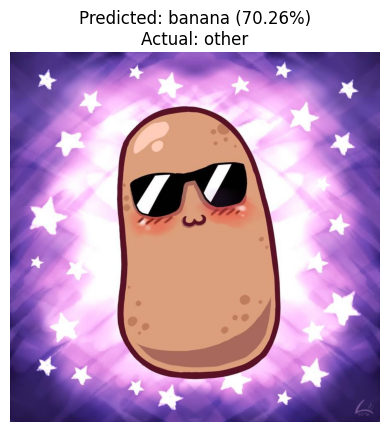

In [ ]:
# Load classes
test_dir = "../dataset/test"
available_classes = sorted(os.listdir(test_dir))
print("Available classes:", available_classes)

# 🔧 Set this manually to 'banana', 'apple', or 'other'
selected_class = "other"  # change here

# Select a random image from the selected class
img_path = os.path.join(test_dir, selected_class, random.choice(os.listdir(os.path.join(test_dir, selected_class))))

# Load and preprocess image
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

img = Image.open(img_path).convert("RGB")
input_tensor = transform(img).unsqueeze(0)

# Predict
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    probs = torch.nn.functional.softmax(output, dim=1)
    pred_idx = probs.argmax().item()
    confidence = probs.max().item()

# Show image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {available_classes[pred_idx]} ({confidence:.2%})\nActual: {selected_class}")
plt.show()